In [1]:
import pandas as pd
import plotly.express as px
from tqdm.auto import tqdm

In [38]:
df = pd.read_csv('data/sample30sec.csv', parse_dates=['SensorDateTime'])

In [39]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265080 entries, 0 to 265079
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   SensorDateTime       265080 non-null  datetime64[ns, UTC]
 1   ChipPress            265026 non-null  float64            
 2   ChipSaw              265025 non-null  float64            
 3   HighTemperatureOven  265019 non-null  float64            
 4   MainTerminal         265047 non-null  float64            
 5   PickAndPlaceUnit     265048 non-null  float64            
 6   ScreenPrinter        265026 non-null  float64            
 7   SolderingOven        265048 non-null  float64            
 8   VacuumOven           262476 non-null  float64            
 9   VacuumPump1          265047 non-null  float64            
 10  VacuumPump2          265050 non-null  float64            
 11  WashingMachine       265049 non-null  float64            
dtypes:

In [40]:
df = df.sort_values('SensorDateTime').reset_index(drop=True)
df.head()

,SensorDateTime,ChipPress,ChipSaw,HighTemperatureOven,MainTerminal,PickAndPlaceUnit,ScreenPrinter,SolderingOven,VacuumOven,VacuumPump1,VacuumPump2,WashingMachine
0,2017-09-30 22:00:00+00:00,0.0,0.0,0.0,6.290000,-0.01,0.0,0.0,0.0,0.0,0.0,0.02
1,2017-09-30 22:00:30+00:00,0.0,0.0,0.0,6.292000,-0.01,0.0,0.0,0.0,0.0,0.0,0.02
2,2017-09-30 22:01:00+00:00,0.0,0.0,0.0,6.278333,-0.01,0.0,0.0,0.0,0.0,0.0,0.02
3,2017-09-30 22:01:30+00:00,0.0,0.0,0.0,7.190000,-0.01,0.0,0.0,0.0,0.0,0.0,0.02
4,2017-09-30 22:02:00+00:00,0.0,0.0,0.0,7.320000,-0.01,0.0,0.0,0.0,0.0,0.0,0.02


In [41]:
df.shape

(265080, 12)

In [42]:
df.SensorDateTime.describe(datetime_is_numeric=True)

count                                 265080
mean     2017-11-15 22:29:44.999999744+00:00
min                2017-09-30 22:00:00+00:00
25%         2017-10-23 22:14:52.500000+00:00
50%                2017-11-15 22:29:45+00:00
75%         2017-12-08 22:44:37.500000+00:00
max                2017-12-31 22:59:30+00:00
Name: SensorDateTime, dtype: object

In [43]:
feature_var = df.var().sort_values(ascending=False).round(3)

In [44]:
df.PickAndPlaceUnit.describe(percentiles=[.01,.1,.25,.5,.75,.9,.99])

count    265048.000000
mean          0.010455
std           0.063242
min          -0.010000
1%           -0.010000
10%          -0.010000
25%          -0.010000
50%          -0.010000
75%          -0.010000
90%           0.120000
99%           0.258333
max           0.385000
Name: PickAndPlaceUnit, dtype: float64

In [45]:
df[feature_var.index].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99])

,MainTerminal,ChipPress,HighTemperatureOven,SolderingOven,WashingMachine,VacuumPump1,VacuumPump2,ChipSaw,ScreenPrinter,VacuumOven,PickAndPlaceUnit
count,265047.000000,265026.000000,265019.000000,265048.000000,265049.000000,265047.000000,265050.000000,265025.000000,265026.000000,262476.000000,265048.000000
mean,13.963200,0.111504,0.136083,0.084972,0.045725,0.143499,0.029742,0.023266,0.028728,0.004975,0.010455
std,8.975678,1.101098,0.679436,0.582524,0.443488,0.355583,0.148025,0.095026,0.093339,0.074165,0.063242
min,3.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
1%,4.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
10%,5.311667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
25%,6.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
50%,11.730000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
75%,19.572000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000
90%,28.358333,0.000000,0.150000,0.000000,0.020000,1.011667,0.000000,0.000000,0.000000,0.000000,0.120000


In [48]:
VAR_THRESHOLD = 0.05
TS_COL = 'SensorDateTime'

selected_cols = [TS_COL] + feature_var[feature_var > VAR_THRESHOLD].index.to_list()
print('selected cols:', selected_cols)

df = df[selected_cols]

selected cols: ['SensorDateTime', 'MainTerminal', 'ChipPress', 'HighTemperatureOven', 'SolderingOven', 'WashingMachine', 'VacuumPump1']


In [49]:
df

,SensorDateTime,MainTerminal,ChipPress,HighTemperatureOven,SolderingOven,WashingMachine,VacuumPump1
0,2017-09-30 22:00:00+00:00,6.290000,0.0,0.0,0.0,0.02,0.0
1,2017-09-30 22:00:30+00:00,6.292000,0.0,0.0,0.0,0.02,0.0
2,2017-09-30 22:01:00+00:00,6.278333,0.0,0.0,0.0,0.02,0.0
3,2017-09-30 22:01:30+00:00,7.190000,0.0,0.0,0.0,0.02,0.0
4,2017-09-30 22:02:00+00:00,7.320000,0.0,0.0,0.0,0.02,0.0
...,...,...,...,...,...,...,...
265075,2017-12-31 22:57:30+00:00,4.966667,0.0,0.0,0.0,0.00,0.0
265076,2017-12-31 22:58:00+00:00,4.976000,0.0,0.0,0.0,0.00,0.0
265077,2017-12-31 22:58:30+00:00,4.971667,0.0,0.0,0.0,0.00,0.0
265078,2017-12-31 22:59:00+00:00,9.236000,0.0,0.0,0.0,0.00,0.0


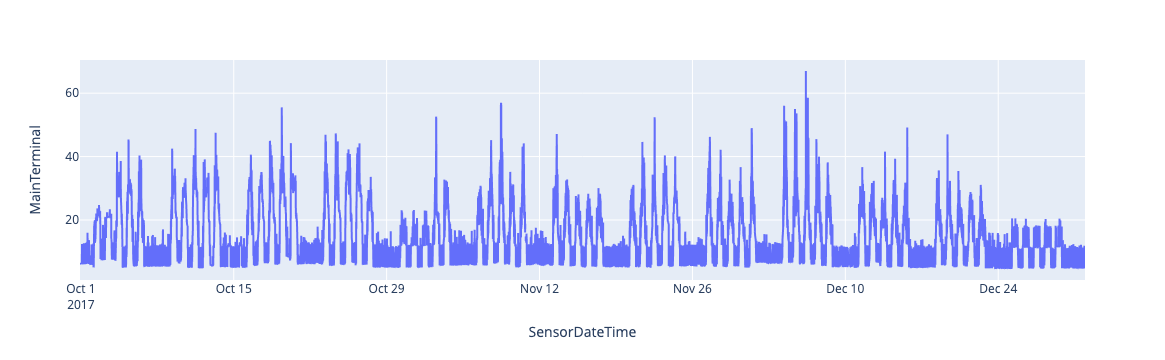

In [51]:
px.line(df.sample(10000, random_state=42).sort_values('SensorDateTime'), x='SensorDateTime', y='MainTerminal')